In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_pos_lda.csv')
data.isnull().sum()

Unnamed: 0    0
Tweet_In      0
dtype: int64

In [3]:
data.head()

,Unnamed: 0,Tweet_In
0,0,olathee for now isnin wfh kickstart for the we...
1,1,kau jenis kerja wfh
2,2,bener ri desember 2019 bilang gin planning tu ...
3,3,jujurly rasa wfh 2 minggu kejar kaya capekkk e...
4,4,saran guyss kerja wfh wfh gtuu daerah bgr


In [26]:
data['Tweet_In'].head(10)

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    olathee for now isnin wfh kickstart for the we...
1                                  kau jenis kerja wfh
2    bener ri desember 2019 bilang gin planning tu ...
3    jujurly rasa wfh 2 minggu kejar kaya capekkk e...
4            saran guyss kerja wfh wfh gtuu daerah bgr
5    ngapain bec cari komponen n gramedia beli atk ...
6    semangat udah nih udah untung wfh benernya uda...
7    wfh hari udh ngomongin heran gua mah manusia t...
8    seminar webinar berjejaring webinar daun pande...
9       wfh gaenaknya gin kalo internetnya ganggu hari
Name: Tweet_In, dtype: object

In [3]:
mylist = list(dict.fromkeys(data['Tweet_In']))

In [4]:
# VEktorizing

In [5]:
text = mylist

In [6]:
# import library

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(text)
print(vectorizer.get_feature_names(), '\n')
print(vector.shape)

['00', '000', '01', '02', '09', '10', '100', '1000', '10702683', '10kg', '11', '11046486', '11368049', '11524498', '11608873', '11761877', '12', '120', '123', '125mbps', '14', '15', '16', '160', '160ml', '17', '172', '17ribuan', '18', '180', '1818', '186', '19', '1bv', '1c', '1jt', '1k', '1x', '1year', '20', '200', '2000', '200gb', '200mbps', '2017', '2019', '2020', '2021', '2022', '20jt', '20jtan', '22', '220', '22nya', '24', '24jam', '25', '250ribu', '26', '26hb', '27', '27hb', '28', '2an', '2dp', '2jt', '2kali', '2minggu', '2mintute', '2nd', '2nya', '2pm', '2x', '30', '300', '30gb', '30menit', '30ml', '30pm', '31', '321', '33', '34', '350', '365', '38', '390', '3hari', '3month', '3months', '3rd', '3x', '400', '40m', '40ml', '40ribu', '445', '45', '45km', '4bln', '4jam', '4pg', '50', '500rb', '50gb', '50k', '52543001', '55', '5hari', '5jt', '62896127', '628961271761', '6jam', '70jtan', '710', '75', '7malem', '90', '93', '95', '9pg', 'a16', 'a3', 'a72', 'aaa', 'aaaa', 'aah', 'aakkkhhh

In [7]:
# Using gensim

In [8]:
# Tokenizing

text_list = [i.split() for i in text]
print(len(text_list))
print(text_list)

2043
[['olathee', 'for', 'now', 'isnin', 'wfh', 'kickstart', 'for', 'the', 'week', 'flexible', 'and', 'bagus', 'utk', 'creative', 't'], ['kau', 'jenis', 'kerja', 'wfh'], ['bener', 'ri', 'desember', '2019', 'bilang', 'gin', 'planning', 'tu', 'mei', 'juni', 'april', 'langsung', 'wfh'], ['jujurly', 'rasa', 'wfh', '2', 'minggu', 'kejar', 'kaya', 'capekkk', 'e', 'dobel', 'dobel', 'pikir'], ['saran', 'guyss', 'kerja', 'wfh', 'wfh', 'gtuu', 'daerah', 'bgr'], ['ngapain', 'bec', 'cari', 'komponen', 'n', 'gramedia', 'beli', 'atk', 'memang', 'remote', 'wfh', 'nya', 'memangny'], ['semangat', 'udah', 'nih', 'udah', 'untung', 'wfh', 'benernya', 'udah', 'pikir', 'sebu'], ['wfh', 'hari', 'udh', 'ngomongin', 'heran', 'gua', 'mah', 'manusia', 'terima', 'banget', 'kalo', 'gua', 'wfh', 'anjg', 'mau', 'gua', 'suruh', 'masuk', 'asw'], ['seminar', 'webinar', 'berjejaring', 'webinar', 'daun', 'pandemi', 'wfh', 'hari', 'sedia', 'puluh'], ['wfh', 'gaenaknya', 'gin', 'kalo', 'internetnya', 'ganggu', 'hari'], ['b

In [9]:
!pip install gensim

In [10]:
# Create phrase using Gensim, Bigram and Trigram
import gensim
from gensim.models import Phrases

In [11]:
# Create bigrams and trigrams to doc, with minimum count 5, mean only upper than 5 times or more.
bigram = gensim.models.Phrases(text_list, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[text_list], threshold=100)

In [12]:
# Tokening bigram and trigram into document

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)

In [13]:
# Create dictionary from text_list

from gensim import corpora, models
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)

# no_below = keep token which are contained in at least no_below document
# no_above = keep token which are contained in no more than no_above document

print(dictionary)

Dictionary(691 unique tokens: ['and', 'bagus', 'for', 'isnin', 'now']...)


In [14]:
# Convert corpus into matrix using dictionary

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

# doc2bow is a function which convert document(list of words) into bag-of-words (vectorizing method)

print(len(doc_term_matrix))
print(doc_term_matrix[10])
tfidf = models.TfidfModel(doc_term_matrix) # build tfidf model
corpus_tfidf = tfidf[doc_term_matrix]

2043
[(30, 1), (34, 1), (47, 1), (48, 1)]


In [15]:
# modeling using gensim and using Coherence Score to evaluate model

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

# Fuction to compute coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                                    dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [16]:
# Apply function

start = 1
limit = 10 # 10 topic
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start,
                                                        limit=limit, step=step)

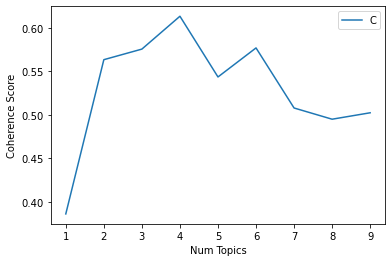

In [17]:
# Visualize the graphs
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('Coherence Values'), loc='best')
plt.show()

In [18]:
# Print Coherence Score

for m, cv in zip(x, coherence_values):
    print('Num Topics =', m, ' has Coherence Value of', round(cv, 5))

Num Topics = 1  has Coherence Value of 0.38616
Num Topics = 2  has Coherence Value of 0.56346
Num Topics = 3  has Coherence Value of 0.57562
Num Topics = 4  has Coherence Value of 0.61339
Num Topics = 5  has Coherence Value of 0.54359
Num Topics = 6  has Coherence Value of 0.57697
Num Topics = 7  has Coherence Value of 0.50792
Num Topics = 8  has Coherence Value of 0.49503
Num Topics = 9  has Coherence Value of 0.50242


In [19]:
# n_topic = 4, best coherence value

In [20]:
# Finding dominant word

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4) # after look at coherence values
for idx, topic in model.print_topics():
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.035*"wfo" + 0.034*"kantor" + 0.022*"paksa" + 0.021*"pulang" + 0.020*"yuk" + 0.020*"the" + 0.020*"biar" + 0.019*"meeting" + 0.017*"knp" + 0.017*"n"
Topic: 1 Word: 0.033*"nya" + 0.029*"wfo" + 0.026*"sih" + 0.026*"data" + 0.025*"pas" + 0.023*"absensi" + 0.022*"gimana" + 0.021*"minggu" + 0.020*"susah" + 0.018*"baca"
Topic: 2 Word: 0.030*"work_from" + 0.018*"doang" + 0.018*"konsep" + 0.018*"2" + 0.017*"pandemi" + 0.016*"biasa" + 0.015*"set" + 0.015*"monitor" + 0.015*"inget" + 0.014*"lunch"
Topic: 3 Word: 0.035*"gak" + 0.028*"cuman" + 0.025*"tidur" + 0.025*"loker" + 0.024*"emang" + 0.021*"gk" + 0.020*"syukur" + 0.019*"kalo" + 0.018*"2x" + 0.018*"guys"


In [21]:
# Show top 10 words in each topic

top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn=10)])

In [22]:
df_new = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
df_new

,Topic,Word,P
0,0,wfo,0.035046
1,0,kantor,0.034020
2,0,paksa,0.021565
3,0,pulang,0.020686
4,0,yuk,0.020449
5,0,the,0.020033
6,0,biar,0.019850
7,0,meeting,0.019152
8,0,knp,0.017491
9,0,n,0.017130


In [30]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl


In [23]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.save_html(vis, 'lda-gensim-sentiment-positif.html')